# <b>1 <span style='color:#DC143C'>|</span> ABOUT THE ANALYSIS</b>

>Every year Kagglers all over the world are provided with this unique opportunity to explore Kaggle's annual ML survey data where participants are required to tell a unique and compelling story using the survey data. This year is no exception. I've chosen to examine this survey using my experience as a Data Scientist who has (fortunately) worked on real-world implementations(rather thrown into it) of end-to-end data science and machine learning projects. 

>Working on real-world projects taught me that Data Science, Machine Learning, and AI in general are much more than just creating cutting-edge state of the art models with the best accuracy metrics. It is difficult to justify the large sums of money invested on data science and machine learning initiatives by any organization unless your analytics and the machine learning models are served to customers that offer value to their business.

>Do you know that **around 87 percent of data science projects never make it to production?**.[[1]](https://venturebeat.com/2019/07/19/why-do-87-of-data-science-projects-never-make-it-into-production/) Still the AI leaders continue to increase their expenditure budgets year after year even during the pandemic, according to Venturebeat's 2019 and 2020 study respectively.[[2]](https://venturebeat.com/2020/12/02/ai-budgets-expected-to-expand-in-2021-despite-pandemic/)


>The following are a few challenges(apart from producing good quality software code) in this profession, based on my experience in the industry:

>1. Too much expectations from Machine Learning projects and treating it like a software engineering project. 
>1. Failing to identify the customer pain points that need to be addressed before offering a solution.
>1. Teams(of data scientists, ml engineers, software engineers, sales and marketing and offcourse the higher management) not working collaboratively.
>1. Not identifying and vetting the data sources or assesing the data preparedness of a customer at the beginning.
>1. Lack of awareness of tools and technologies available to deploy machine learning models in production.

>Out of the five points above, I had the most **issues with determining the correct set of tools to utilize when deploying the models in production, i.e. point number 5**. With so many rapidly changing technologies and a myriad of frameworks and services, finding the correct software stack and using it for Machine Learning deployment got quite difficult.

><b><span style='color:#5D2ECC'>That's why I'm going to use this survey to learn more about the top performing tools and services from Kagglers who have actually worked on putting Machine Learning models in production</span></b>

In [ ]:
import numpy as np 
import pandas as pd 
from typing import List
import plotly.graph_objects as go
import plotly.express as px
import textwrap
import os
import warnings
from IPython.display import Image
warnings.filterwarnings("ignore")

In [ ]:
# Let's write some functions to quickly reproduce the plots. Here I am going to use plotly's donut charts and sunburst charts

# Define the colors
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen', 'orangered','orchid', 'palegoldenrod', 
          'linen', 'magenta', 'maroon', 'mediumaquamarine', 'mediumblue']

colors_2 = ['gold',]*6
colors_2[3:4] = ['mediumturquoise']
colors_2[4:5] = ['mediumturquoise']

# [1] Text wrap function to wrap the long labels of the plots.  https://community.plotly.com/t/wrap-long-text-in-title-in-dash/11419
def customwrap(s, width):
    return "<br>".join(textwrap.wrap(s,width=width))


def question_to_plot_type_1(question_number: str, 
                            df: pd.DataFrame, 
                            pull_list: List, 
                            label: str, 
                            position: str,
                            color: str, 
                            wrap_width: None):
    """
    Function to generate pie charts for survey questions with one column answer
    
    :param question_number: provide the question number
    :param df: the dataframe 
    :param pull_list: to get a exploded layout to pull all or some sectors of a pie chart by providing the fraction of larger radius  
    :param label: the title of the question or chart
    :param position: text position for labels incase customization is required
    :param color: color of the chart
    :param wrap_width: provide the desired width to wrap the long labels in the plot
    """
    final_df = df.iloc[1:][question_number].value_counts(normalize=True).reset_index()
    
    labels = final_df['index'].map(lambda n: customwrap(n, width=wrap_width)).tolist()
    values = final_df[question_number].tolist()

    fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3, pull=pull_list)])

    fig.update_traces(textposition=position, hoverinfo='label+percent', textinfo='label+percent', textfont_size=12, 
                      insidetextorientation='radial', marker=dict(colors=color, line=dict(color='#000000', width=1)))

    fig.update_layout(title_text=label, title_x=0.5, margin=dict(t=40, l=40, r=40, b=40), showlegend=False)
    fig.show()
    
    
def question_to_plot_type_2(question_list: List, 
                            df_to_stack: pd.DataFrame, 
                            pull_list: List, 
                            label: str, 
                            position: str,
                            color: str, 
                            wrap_width: None):
    """
    Function to generate pie charts for survey questions with multiple column answer
    
    :param question_list: provide the list of columns that are a part of a particular survey question
    :param df_to_stack: dataframe
    :param pull_list: to get a exploded layout to pull all or some sectors of a pie chart by providing the fraction of larger radius
    :param label: title of the plot
    :param position: text position for labels incase customization is required
    :param color: color of the chart
    :param wrap_width: provide the desired width to wrap the long labels in the plot
    :return: 
    """
    stacked_df = df_to_stack[question_list].stack().reset_index()
    final_df = stacked_df[0].value_counts(normalize=True).reset_index()

    labels = final_df['index'].map(lambda n: customwrap(n, width=wrap_width)).tolist()
    values = final_df[0].tolist()

    fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3, pull=pull_list)])

    fig.update_traces(textposition=position, hoverinfo='label+percent', textinfo='label+percent', textfont_size=12,
                      insidetextorientation='radial', marker=dict(colors=color, line=dict(color='#000000', width=1)))

    fig.update_layout(title_text=label, title_x=0.5, showlegend=False)
    fig.show()
    

def question_to_plot_type_3(question_number: str, 
                            df: pd.DataFrame, 
                            percent_limit: float, 
                            label: str):
    """
    Function to generate plotly's sunburst charts for survey questions with one column answer
    
    :param question_number: provide the question number
    :param df: dataframe
    :param percent_limit: cut-off percent to divide between top categories and more categories(needs to be decided based on the plot)
    :param label: title of the plot 
    """
    final_df = df.iloc[1:][question_number].value_counts(normalize=True).reset_index()

    final_df['index'] = final_df['index'].map(lambda n: customwrap(n, width=20))
    final_df['parent'] = final_df['index']
    final_df.loc[final_df[question_number] < percent_limit, 'parent'] = 'more_categories'
    final_df.loc[final_df['parent'] != 'more_categories', 'parent'] = "top_categories"
    final_df[question_number] = final_df[question_number].multiply(100).round(3)

    fig = px.sunburst(final_df, path=['parent', 'index'],
                      values=question_number, color_discrete_sequence=colors)

    fig.update_traces(hoverinfo='percent root', textinfo='label+percent root', textfont_size=12,
                      insidetextorientation='radial', marker=dict(line=dict(color='#000000', width=1)))
    fig.update_layout(title_text=label, title_x=0.5, title_y=1, margin=dict(t=30, l=30, r=30, b=30))
    fig.show()
    
    
def question_to_plot_type_4(question_list: List, 
                            df_to_stack: pd.DataFrame, 
                            percent_limit: float, 
                            label: str):
    
    """
    Function to generate plotly's sunburst charts for survey questions with multiple column answer
    
    :param question_list: provide the list of columns that are a part of a particular survey question
    :param df: dataframe
    :param percent_limit: cut-off percent to divide between top categories and more categories(needs to be decided based on the plot)
    :param label: title of the plot 
    """
    
    stacked_df = df_to_stack[question_list].stack().reset_index()
    final_df = stacked_df[0].value_counts(normalize=True).reset_index()

    final_df['index'] = final_df['index'].map(lambda n: customwrap(n, width=20))
    final_df['parent'] = final_df['index']
    final_df.loc[final_df[0] < percent_limit, 'parent'] = 'more_categories'
    final_df.loc[final_df['parent'] != 'more_categories', 'parent'] = "top_categories"
    final_df[0] = final_df[0].multiply(100).round(3)

    fig = px.sunburst(final_df, path=['parent', 'index'],
                      values=final_df[0], color_discrete_sequence=colors)

    fig.update_traces(hoverinfo='percent root', textinfo='label+percent root', textfont_size=12,
                      insidetextorientation='radial', marker=dict(line=dict(color='#000000', width=1)))
    fig.update_layout(title_text=label, title_x=0.5, title_y=1, margin=dict(t=30, l=30, r=30, b=30))
    fig.show()

# <b>2 <span style='color:#DC143C'>|</span> METHODOLOGY AND STRUCTURE</b>

<div style="color:white;display:fill;border-radius:5px;background-color:#FFD700;
       font-size:150%;font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 10px;color:black;"><b>2.1 | THE METHODOLOGY:</b></p>
</div>

In order to explore the findings about Kagglers who have deployed machine learning in production, I have taken the help of question number 23 from the survey, which states that:

"Does your current employer incorporate machine learning methods into their business?"

The choices are:

>1. No (we do not use ML methods)
>2. I do not know
>3. We use ML methods for generating insights (but do not put working models into production)
>4. We are exploring ML methods (and may one day put a model into production)
>5. We recently started using ML methods (i.e., models in production for less than 2 years)
>6. We have well established ML methods (i.e., models in production for more than 2 years)
>7. Blanks



The next step I followed is to group the plots into two categories by selecting two answer options from above. Those who have responded "We recently started using ML methods (i.e., models in production for less than 2 years)" and 
"We have well established ML methods (i.e., models in production for more than 2 years)" are considered "Yes for deployment" and the rest are categorized as "No for deployment".

Reason: I wanted to know the responses for other questions from those who have actually worked on deploying Machine Learning models in production.

The next methodology I adopted is categorizing the relevant questions into different stages of end-to-end ML Learning deployment pipeline. 

Reason: I wanted to know how many relevant questions were asked in the survey when it came to ML deployment. Do we need any more such questions in the future.

>Note: The first thing to note here is that, Blanks made upto 38% of the responses. If we consider all responses(including blanks) we have 18% of the respondents who have experience in ML production. Since the intention of this analysis is to know about the tools and frameworks for ML in production from those who have actually been there and done that. I decided to remove the blanks before doing the analysis, in order to tone down the confusion in the plots, maintain consistency and understandability. This action will result in increase in percent of those who have experience in ML in production to 30%(and this percent is calculated after removing the respondents with blank response). 


<div style="color:white;display:fill;border-radius:5px;background-color:#FFD700;
       font-size:150%;font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 10px;color:black;"><b>2.2 | THE STRUCTURE:</b></p>
</div>

There are no set rules for assigning questions to any category, but after some consideration, I've opted to examine the survey findings in three stages of a machine learning deployment pipeline with an additional 'General category' for the purpose of this survey. 

Below is a high-level architecture of a machine learning system that I created based on my experience with this methodology. This may or may not be the best design to follow, because ML system designs differ from business to business. Depending on your needs, a lot of things can be added or removed from this design. It can even be more granular in some circumstances(we must always seek knowledge from the experts and the experienced), in fact you can refer this google's architecture for a more comprehensive design and knowledge based on the stage at which you are in your ML journey [[4]](https://cloud.google.com/architecture/mlops-continuous-delivery-and-automation-pipelines-in-machine-learning) . However, I believe this design is a decent starting point for our use case, which is analyzing this survey. 
>The plots used are from Plotly's sunburst charts(frankly bar charts are my favorite to explore survey data, easy to understand and hassle free, however, I decided to try something different this time. Make sure to click on the sunburst plots to know different categories in each question)[[3]](https://plotly.com/python/sunburst-charts/) In the plots you will find there are top performing categories that have high percentages in the survey and more categories with low percent responses. Different percentage benchmarks are used based on the overall distribution for each of these questions. There are few donut charts as well, depending upon the number of categories each question has. For example, if a question has just 4-5 distinct category, I have used donut charts there. 

The relevant questions are categorized are as follows:
    
1. General
    
1. Data Engineering pipeline
    
1. Machine Learning pipeline
    
1. deployment pipeline

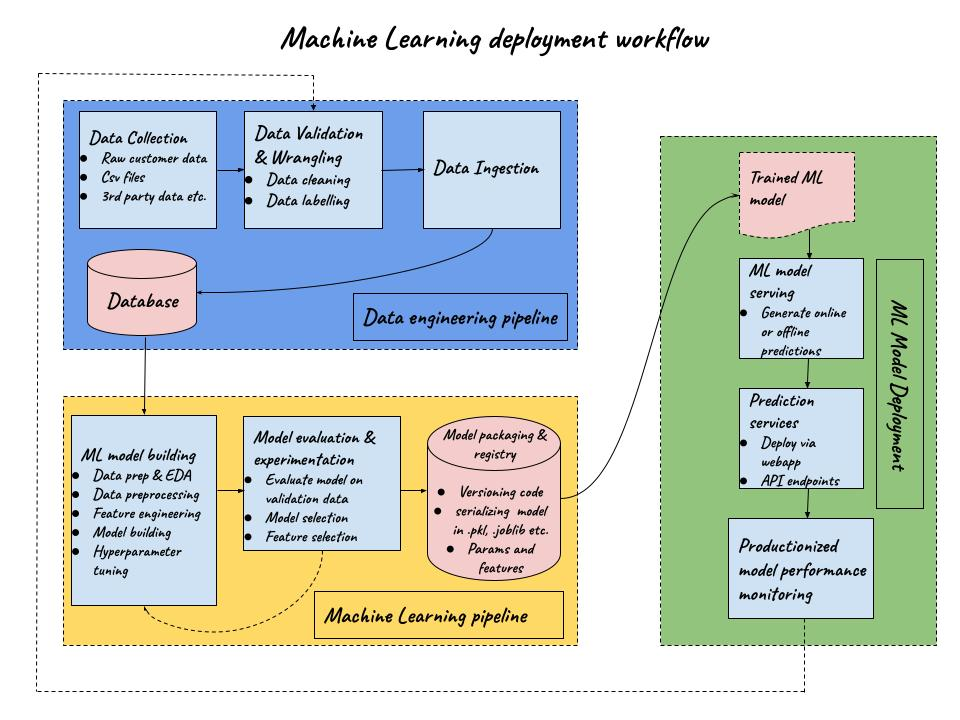

In [ ]:
survey_2021 = pd.read_csv('/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv')
survey_2021 = survey_2021.dropna(subset = ['Q23'])

# <b>3 <span style='color:#DC143C'>|</span>MACHINE LEARNING IN PRODUCTION-GENERAL</b>

The General status of Machine Learning models in Production through the lens of Kaggle survey:
In this section I am trying to explore questions like experience, most used languages, designation and industry etc. The observations are in the box below followed by the plots.

<div class="alert alert-warning" role="alert">
    <h4 class="alert-heading"><span style="color:black">Observations:</span></h4>
<span style="color:black">
    
    
   1. 30% of respondents have experience in deploying machine learning models in production.

   2. Data Scientists, ML engineers and Software engineers are mostly involved in ML production. There are no students in this category(rightly so).

   3. Close to 30% of the respondents who have experience in ML in production have more than 10 years of experience in writing code or doing programming.

   4. Python and SQL are the top languages used by kagglers having experience in ML deployment.

   5. Jupyter Notebooks, VS Code and Pycharm are the top 3 IDE used on a regular basis.

   6. Computer Technology, Accounting/Finance, Academics/Education are the top 3 industries where Kagglers with ML deployment experience work.
   7. Python and SQL languages are mostly used for the data engineering related tasks.
    
   8. 40% of the respondents have a data science team size of 20+ 
    
   9. 53% of respondents say they have a company size of 1000 or more people

In [ ]:
question_to_plot_type_1(question_number = 'Q23', 
                        df=survey_2021, 
                        pull_list=[0,0,0,0.15, 0.15], 
                        label = '30% of the respondents have experience in deploying ML models in production', 
                        position= 'outside', color =colors_2, wrap_width = 25)

In [ ]:
ml_deployment = ['We have well established ML methods (i.e., models in production for more than 2 years)', 
                 'We recently started using ML methods (i.e., models in production for less than 2 years)']

survey_2021['ml_deployment'] = np.where(survey_2021['Q23'].isin(ml_deployment), 'Yes for deployment', 'No for deployment')

# Now time to concentrate on the group who have responded "yes for deployment"
survey_ml_dep = survey_2021[survey_2021['ml_deployment'] == 'Yes for deployment']

In [ ]:
title = 'The top categories are Data Scientists, ML Engineers and Software Engineers'
question_to_plot_type_3(question_number= 'Q5', 
                        df=survey_ml_dep, 
                        percent_limit = 0.08, 
                        label = title)

In [ ]:
colors_2 = ['gold',]*7
# colors_2[0:1] = ['mediumturquoise']
colors_2[3:4] = ['mediumturquoise']
colors_2[4:5] = ['mediumturquoise']
title = 'close to 30% of respondents have more than 10 years of experience'
question_to_plot_type_1(question_number = 'Q6', 
                        df=survey_ml_dep, 
                        pull_list=[0, 0, 0, 0.15, 0.15], 
                        label = title, 
                        position= 'auto', 
                        color =colors_2, 
                        wrap_width = 30)

In [ ]:
Q7= ['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 
     'Q7_Part_10', 'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER']

title = 'Programming languages used in regular basis'

question_to_plot_type_4(question_list = Q7, 
                        df_to_stack = survey_ml_dep, 
                        label = title, 
                        percent_limit = 0.10)

In [ ]:
Q9= ['Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q9_Part_9', 
     'Q9_Part_10', 'Q9_Part_11', 'Q9_Part_12', 'Q9_OTHER']

title = 'Integrated development environments (IDE) used on a regular basis'

question_to_plot_type_4(question_list = Q9, 
                        df_to_stack = survey_ml_dep, 
                        label = title, 
                        percent_limit = 0.10)

In [ ]:
title = 'Industry'
question_to_plot_type_3(question_number = 'Q20', 
                        df=survey_ml_dep, 
                        label = title, 
                        percent_limit = 0.05)

In [ ]:
title = 'DS Team Size'
question_to_plot_type_3(question_number = 'Q22', 
                        df=survey_ml_dep, 
                        label = title, 
                        percent_limit = 0.15)

In [ ]:
title = 'Company Size'
question_to_plot_type_3(question_number = 'Q21', 
                        df=survey_ml_dep, 
                        label = title, 
                        percent_limit = 0.20)

# <b>4 <span style='color:#DC143C'> | </span>ML IN PRODUCTION-THROUGH THE LENS OF DATA ENGINEERING PIPELINE</b>



>Now it's time to dismantle the whole architecture into 3 key components as described above in the methodology section, and analyze the first component i.e. The Data Engineering Pipeline. I am going to put the data engineering section from the architecture first to see how the questions asked in the survey align with this section. 
Note: As informed above- this is a general architecture, for the purposes of just getting started. For example, Here I have kept the data wrangling and data processing steps before ingestion. In some cases you can do the other way round i.e. storing the raw data first in its native format in a datawarehouse or datalake before applying a transformation. 

>One of the most important requirements of a successful data science and machine learning project is the availability of raw data in usable formats for these projects. This is where the mighty data engineering field comes into play. Data Modelling, identifying the correct database to choose, schema designs, building scalable and reusable data pipelines and handling the volume, variety and velocity of big data systems is what makes the data engineering skills a major on demand skill.

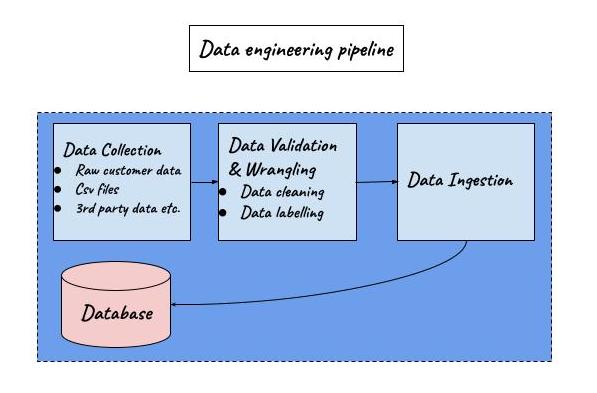
    
    
<div class="alert alert-warning" role="alert">
    <h4 class="alert-heading"><span style="color:black">Observations:</span></h4>
<span style="color:black">
    
1. Only 5% of Data Engineers have experience in ML in production.

2. Relational database management systems such as MySQL, PostgreSql, and Sqlite are used mostly.

3. MongoDB is the most used NoSQL database program in the list.

4. Amazon S3 is the most used data storage service followed by Google's cloud storage service.

5. Although knowledge about data warehousing is insightful, however, there are other important questions that can be asked during this survey, for example,
    - The types of data processing used mostly, is it batch processing, stream processing, real-time and near-real time (NRT) processing.
    - Types of data such as structured, unstructured, semi-structured data, and the top format in which the data is made available for the data engineers to process i.e. csv, geojson, third party data etc.

In [ ]:
Q32= ['Q32_A_Part_1', 'Q32_A_Part_2', 'Q32_A_Part_3', 'Q32_A_Part_4', 'Q32_A_Part_5', 'Q32_A_Part_6', 'Q32_A_Part_7', 'Q32_A_Part_8','Q32_A_Part_9','Q32_A_Part_10', 'Q32_A_Part_11','Q32_A_Part_12', 'Q32_A_Part_13', 'Q32_A_Part_14', 'Q32_A_Part_15', 'Q32_A_Part_16', 'Q32_A_Part_17', 'Q32_A_Part_18','Q32_A_Part_19','Q32_A_Part_20','Q32_A_OTHER']

title = 'Big data products'

question_to_plot_type_4(question_list = Q32, 
                        df_to_stack = survey_ml_dep, 
                        label = title, 
                        percent_limit = 0.05)

In [ ]:
Q30= ['Q30_A_Part_1', 'Q30_A_Part_2', 'Q30_A_Part_3', 'Q30_A_Part_4', 'Q30_A_Part_5', 'Q30_A_Part_6', 'Q30_A_Part_7', 'Q30_A_OTHER']

title = 'Data storage products'

question_to_plot_type_4(question_list = Q30, 
                        df_to_stack = survey_ml_dep, 
                        label = title, 
                        percent_limit = 0.10)

# <b>5 <span style='color:#DC143C'> | </span>ML IN PRODUCTION-THROUGH THE LENS OF MACHINE LEARNING PIPELINE</b>



>The next category is Machine Learning Pipeline. Machine Learning is an iterative process, where we go back and forth between the model building phase and model evaluation phase and conduct experimentation on steps like feature engineering, hyperparameter tuning and model evaluation.
A lot of related questions in this diagram below were asked in this survey and I found the questions quite comprehensive. For example, there are questions related to Machine Learning frameworks, ML algorithms, most used hardware etc. We will dive into them and also see what else could have been asked during this survey to understand the ML in production scenario in the Industry.

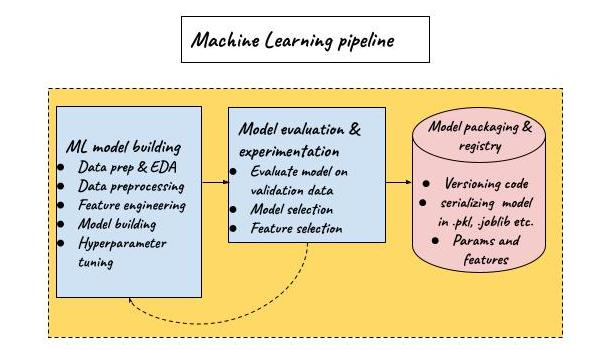


<div class="alert alert-warning" role="alert">
    <h4 class="alert-heading"><span style="color:black">Observations:</span></h4>
<span style="color:black">

1. It is good to know that around 23% of the respondents analyze and understand the data to influence products and business decisions. When it comes to building a machine learning pipeline or a data science project, the first and the most important step that I always do is perform the EDA and familiarize myself with the data so that I am able to create different features, inform the customer if we can get value out of the data and answer questions like do we need more data? third party data? augment data?, if yes then what data it should be. Same goes when deriving features from raw data. 

2. Scikit-Learn is still most used ML frameworks followed by Tensorflow.

3. More than 50% of the respondents use the traditional ML methods such as RandomForest, Logistic regression etc. Actually in some cases these the traditional ML algorithms prove to be highly efficient and less time and compute consuming.

4. 53% of the respondents who have experience deploying ML models in production use a laptop as their computing platform. This commensurates well with the use of traditional ML models used above. 21% use a cloud computing platform like AWS, Azure and GCP.

5. 43% of the respondents do not use any automated ML tools, and around 22% of the respondents use automated hyperparameter tuning and automated model selection.

6. When it comes to using tools for carrying out ML experimentations, 43% of the respondents don't use any. But for those who use it Tensorboard seems to be most popular with 23% responders followed by MLflow.
    
7. 41% of the respondents who have experience in ML in production have never used a GPU and 57% of the respondents have never used A TPU.
    
8. Apart from the above good points asked in the survey, I feel there should be some questions related to the following topics:
    - ML explainability, for example how much time the respondents spend in explaining ML model output to the customers and try to figure out which factors are causing the output or predictions in a certain way(Believe me this is the most challenging part I personally feel, trying to defend the output of our ML models infront of non-technical customers, it becomes even more challenging when the model complexity increases.)
    - What metrics the respondents use to judge the performance of a ML model in production. It's not about the adjusted r-squared value, mean absolute error or the ROC curve, even if it is how they explain it to the customers/stakeholders. Are there any customer decided pre-defined metrics?

In [ ]:
Q24= ['Q24_Part_1', 'Q24_Part_2', 'Q24_Part_3', 'Q24_Part_4', 'Q24_Part_5', 'Q24_Part_6', 'Q24_Part_7','Q24_OTHER']

title = 'Important activity'

question_to_plot_type_4(question_list = Q24, 
                        df_to_stack = survey_ml_dep, 
                        label = title, 
                        percent_limit = 0.10)

In [ ]:
Q16= ['Q16_Part_1', 'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_5', 'Q16_Part_6', 'Q16_Part_7', 'Q16_Part_8', 'Q16_Part_9', 
     'Q16_Part_10', 'Q16_Part_11', 'Q16_Part_12', 'Q16_Part_13','Q16_Part_14','Q16_Part_15','Q16_Part_16','Q16_Part_17','Q16_OTHER']
title = 'Top ML Frameworks'
question_to_plot_type_4(question_list = Q16, 
                        df_to_stack = survey_ml_dep, 
                        label = title, 
                        percent_limit = 0.10)

In [ ]:
Q17= ['Q17_Part_1', 'Q17_Part_2', 'Q17_Part_3', 'Q17_Part_4', 'Q17_Part_5', 'Q17_Part_6', 'Q17_Part_7', 'Q17_Part_8', 'Q17_Part_9', 
     'Q17_Part_10', 'Q17_Part_11', 'Q17_OTHER']

title = 'Top ML Algorithms'
question_to_plot_type_4(question_list = Q17, 
                        df_to_stack = survey_ml_dep, 
                        label = title, 
                        percent_limit = 0.10)

In [ ]:
title = 'Computing platform'
question_to_plot_type_3(question_number = 'Q11', 
                        df=survey_ml_dep, 
                        label = title, 
                        percent_limit = 0.10)

In [ ]:
Q12= ['Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3', 'Q12_Part_4', 'Q12_Part_5', 'Q12_OTHER']

title = 'specialized hardware'

question_to_plot_type_4(question_list = Q12, 
                        df_to_stack = survey_ml_dep, 
                        label = title, 
                        percent_limit = 0.05)

In [ ]:
title = 'TPU Usage hours'
question_to_plot_type_3(question_number = 'Q13', 
                        df=survey_ml_dep, 
                        label = title, 
                        percent_limit = 0.10)

In [ ]:
Q36= ['Q36_A_Part_1', 'Q36_A_Part_2', 'Q36_A_Part_3', 'Q36_A_Part_4', 'Q36_A_Part_5', 'Q36_A_Part_6', 'Q36_A_Part_7', 'Q36_A_OTHER']

title = 'Automated ML tools'
question_to_plot_type_4(question_list = Q36, 
                        df_to_stack = survey_ml_dep, 
                        label = title, 
                        percent_limit = 0.10)

In [ ]:
Q37= ['Q37_A_Part_1', 'Q37_A_Part_2', 'Q37_A_Part_3', 'Q37_A_Part_4', 'Q37_A_Part_5', 'Q37_A_Part_6', 'Q37_A_Part_7', 'Q37_A_OTHER']

title = 'Automated ML tools'
question_to_plot_type_4(question_list = Q37, 
                        df_to_stack = survey_ml_dep, 
                        label = title, 
                        percent_limit = 0.10)

In [ ]:
Q38= ['Q38_A_Part_1', 'Q38_A_Part_2', 'Q38_A_Part_3', 'Q38_A_Part_4', 'Q38_A_Part_5', 'Q38_A_Part_6', 'Q38_A_Part_7', 'Q38_A_Part_8','Q38_A_Part_9','Q38_A_Part_10','Q38_A_Part_11','Q38_A_OTHER']

title = 'Tools to manage ML experiments'
question_to_plot_type_4(question_list = Q38, 
                        df_to_stack = survey_ml_dep, 
                        label = title, 
                        percent_limit = 0.10)

# <b>6 <span style='color:#DC143C'> | </span>ML IN PRODUCTION-THROUGH THE LENS OF MODEL DEPLOYMENT</b>

>Now the tricky part Model Deployment, deploying a ML model in production and at scale is very important if you want to create business value out of your ML and DS experiments and involves a lot of components and cross-functional expertise such as integrating the ML predictions in the existing software, automating the deployment process, tracking model performance to identify model decay etc. 

>When it comes to deploying machine learning models in production, we cannot skip the cloud computing part. Cloud computing plays a pivotal role when a model goes to production and it is important to scale. It is the go-to strategy to deploy ML models using containerization services such as Docker and container orchestration services like Kubernetes. Thankfully, there are plenty of cloud platforms avaialble to take up most of the deployment task, but choosing the right one which is efficient and cost effective is often time consuming. Let's first see couple of questions related to cloud computing, tools and cloud platforms that are being used, and then we will discuss what else could have been insightful.

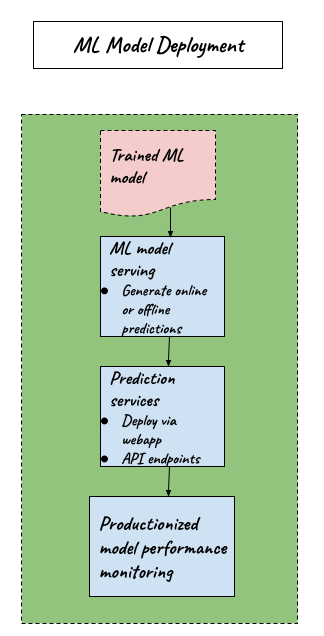

<div class="alert alert-warning" role="alert">
    <h4 class="alert-heading"><span style="color:black">Observations:</span></h4>
<span style="color:black">

1. For more than 30% of respondents the money spent on cloud services is more than 10,000 USD.

2. AWS, GCP and Microsoft Azure are the 3 most used cloud computing services platforms

3. Amazon EC2, Google cloud compute engine and Microsoft Azure virtual machines are most used cloud computing products

4. Around 48% of the respondents donot use a managed ML products. However, 12% of the respondents have used Amazon Sagemaker to buil, train and deploy ML in cloud.
    
5. Some areas where we can get more insights by asking questions is:
    - Tradeoffs between Latency and Throughput concerns when deploying ML in production
    - Questions related to model versioning, model logging and model decay etc.

In [ ]:
colors_2 = ['gold',]*6
colors_2[2:3] = ['mediumturquoise']
colors_2[4:5] = ['mediumturquoise']
title = 'Money on cloud'
question_to_plot_type_1(question_number = 'Q26', 
                        df=survey_ml_dep, 
                        pull_list=[0, 0, 0.15, 0, 0.15], 
                        label = title, 
                        position= 'auto', 
                        color =colors_2, 
                        wrap_width = 30)

In [ ]:
Q27= ['Q27_A_Part_1', 'Q27_A_Part_2', 'Q27_A_Part_3', 'Q27_A_Part_4', 'Q27_A_Part_5', 'Q27_A_Part_6', 'Q27_A_Part_7', 'Q27_A_Part_8', 'Q27_A_Part_9', 'Q27_A_Part_10', 'Q27_A_Part_11', 'Q27_A_OTHER']

title = 'Most used cloud computing platform'
question_to_plot_type_4(question_list = Q27, 
                        df_to_stack = survey_ml_dep, 
                        label = title, 
                        percent_limit = 0.10)

In [ ]:
Q29= ['Q29_A_Part_1', 'Q29_A_Part_2', 'Q29_A_Part_3', 'Q29_A_Part_4', 'Q29_A_OTHER']

colors_2 = ['gold',]*5
colors_2[0:1] = ['mediumturquoise']


title = 'Most used cloud computing product'
question_to_plot_type_2(question_list = Q29, 
                        df_to_stack=survey_ml_dep, 
                        pull_list=[0.15, 0], 
                        label = title, 
                        position= 'auto', 
                        color =colors_2, 
                        wrap_width = 30)

In [ ]:
Q31= ['Q31_A_Part_1', 'Q31_A_Part_2', 'Q31_A_Part_3', 'Q31_A_Part_4', 'Q31_A_Part_5', 'Q31_A_Part_6', 'Q31_A_Part_7', 'Q31_A_Part_8','Q31_A_Part_9','Q31_A_OTHER']

title = 'Managed ML product'
question_to_plot_type_4(question_list = Q31, 
                        df_to_stack = survey_ml_dep, 
                        label = title, 
                        percent_limit = 0.10)

In [ ]:
Q39= ['Q39_Part_1', 'Q39_Part_2', 'Q39_Part_3', 'Q39_Part_4', 'Q39_Part_5', 'Q39_Part_6', 'Q39_Part_7', 'Q39_Part_8','Q39_Part_9','Q39_OTHER']

title = 'Platform to share ML applications and data analysis'
question_to_plot_type_4(question_list = Q39, 
                        df_to_stack = survey_ml_dep, 
                        label = title, 
                        percent_limit = 0.10)

# <b>7 <span style='color:#DC143C'> | </span>SUMMARY AND CONCLUSION:</b>

> What we learnt from Kagglers experienced in deploying machine learning in production:
> - ML in production is a collaborative work- 40% of respondents work in a data science team size of 20+, and 53% work in a company size of 1000+ employees.
> - Most of the real world problems are solvable through the classical machine learning techniques such as Linear and logistic regressions, Tree based models etc. 
> - EDA still remains an important activity for those who are into building Machine Learning powered solutions. 
> - There are fewer(just 5%) Data Engineers in this survey who have experience in ML deployment than Data Analysts (around 12%). 
> - Cloud technology is catching up with 80% of the experienced respondents have affirmed the expenditure on cloud technology by their companies.
> - AWS products and services are the most used in the cloud computing arena.

Personally, I got a lot of questions answered through this survey when it came to tools, services and platforms. Being in the field of data science and machine learning feels good and fancy until you encounter the bottleneck of serving machine learning models in production. Apart from building reliable and explainable model, maintaining and monitoring the models is equally important. I am not saying that everyone needs to know how each and every product, framework or algorithm work, but if learning and deploying models in production is your company's goal, it is highly important to work collaboratively with cross-functional teams of data engineers, ml engineers, data scientists and software engineers. Cognizance of newly developing technologies(and not to forget the customer feedbacks) is going to be really helpful and will make a positive impact on your data science career. 

# <b>8 <span style='color:#DC143C'> | </span>REFERENCES:</b>

1. https://venturebeat.com/2019/07/19/why-do-87-of-data-science-projects-never-make-it-into-production/

2. https://venturebeat.com/2020/12/02/ai-budgets-expected-to-expand-in-2021-despite-pandemic/

3. https://plotly.com/python/sunburst-charts/

4. https://cloud.google.com/architecture/mlops-continuous-delivery-and-automation-pipelines-in-machine-learning